<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/B%C3%A0i_t%E1%BA%ADp_v%E1%BB%81_nh%C3%A0_tu%E1%BA%A7n_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
!pip install kagglehub
import kagglehub
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
path = kagglehub.dataset_download("feyiamujo/human-palm-images")
print("Path to dataset files:", path)
if "files" in os.listdir(path):
    path = os.path.join(path, "files")

100%|██████████| 924M/924M [00:10<00:00, 92.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/feyiamujo/human-palm-images/versions/1


In [3]:
def load_palm_dataset(folder_path, img_size=(64, 64)):
    X, y = [], []
    for label, gender in enumerate(['FEMALE', 'MALE']):
        subfolder = os.path.join(folder_path, gender)
        for fname in os.listdir(subfolder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            path = os.path.join(subfolder, fname)
            img = cv2.imread(path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)

In [4]:
x, y = load_palm_dataset(path)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5039 - loss: 1.3279 - val_accuracy: 0.5000 - val_loss: 0.7656
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6280 - loss: 0.6574 - val_accuracy: 0.6687 - val_loss: 0.6013
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6629 - loss: 0.6898 - val_accuracy: 0.6062 - val_loss: 0.6755
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7030 - loss: 0.6421 - val_accuracy: 0.5063 - val_loss: 1.5877
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6071 - loss: 0.9807 - val_accuracy: 0.6375 - val_loss: 0.8149
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6790 - loss: 0.6911 - val_accuracy: 0.6125 - val_loss: 0.7643
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6901 - loss: 0.5711 - val_accuracy: 0.6500 - val_loss: 0.6637
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7657 - loss: 0.4752 - val_accuracy: 0.6938 - v

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
tien doan la: 0


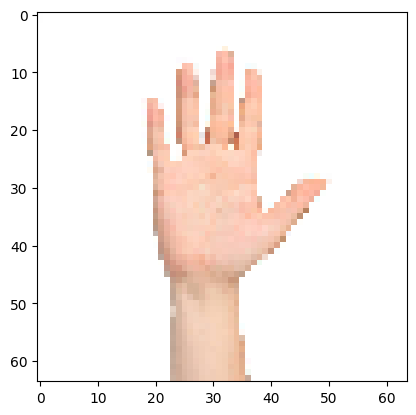

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

url = '/content/drive/MyDrive/AI/ảnh bàn tay.jpg'
img = load_img(url, target_size=(64,64))
plt.imshow(img)
img = img_to_array(img) / 255
img = img.reshape(1,64,64,3)
prediction = model.predict(img)
print('tien doan la:', np.argmax(prediction))

In [10]:
path = kagglehub.dataset_download("alxmamaev/flowers-recognition")
print("Path to dataset files:", path)
if "files" in os.listdir(path):
    path = os.path.join(path, "files")

100%|██████████| 225M/225M [00:01<00:00, 184MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/alxmamaev/flowers-recognition/versions/2


In [11]:
def load_dataset(folder_path, class_names, img_size=(64, 64)):
    X, y = [], []
    for label, class_name in enumerate(class_names):
        subfolder = os.path.join(folder_path, class_name)
        if not os.path.isdir(subfolder):
            print(f"Bỏ qua: {subfolder} không tồn tại")
            continue
        for fname in os.listdir(subfolder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            path = os.path.join(subfolder, fname)
            img = cv2.imread(path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)

In [13]:
path = '/root/.cache/kagglehub/datasets/alxmamaev/flowers-recognition/versions/2/flowers'
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
x, y = load_dataset(path, class_names)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [14]:
model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.3155 - loss: 2.6857 - val_accuracy: 0.4167 - val_loss: 1.5541
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4120 - loss: 1.3892 - val_accuracy: 0.4109 - val_loss: 1.3760
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.4489 - loss: 1.2953 - val_accuracy: 0.4039 - val_loss: 1.4454
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.4801 - loss: 1.2673 - val_accuracy: 0.4363 - val_loss: 1.3648
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.4928 - loss: 1.1625 - val_accuracy: 0.4294 - val_loss: 1.3725
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5219 - loss: 1.1172 - val_accuracy: 0.4641 - val_loss: 1.2972
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.5373 - loss: 1.1184 - val_accuracy: 0.4433 - val_loss: 1.3598
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5464 - loss: 1.0853 - val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
tien doan la: 4


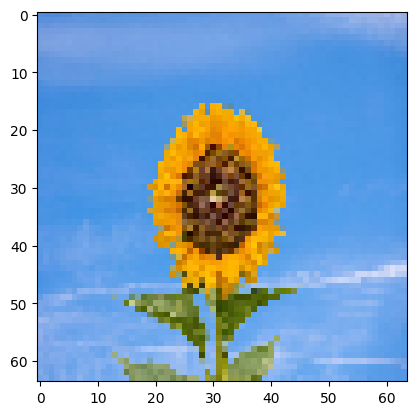

In [17]:
url='/content/drive/MyDrive/AI/flowers-7135053_1280.jpg'
img = load_img (url, target_size= (64,64))
plt. imshow (img)
img = img_to_array (img) / 255
img = img. reshape (1,64,64, 3)
prediction = model. predict (img)
print( 'tien doan la:', np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
tien doan la: 0


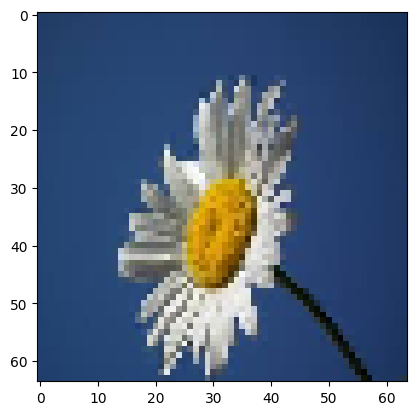

In [18]:
url = '/content/drive/MyDrive/AI/images (1).jpeg'
img = load_img (url, target_size= (64,64))
plt. imshow (img)
img = img_to_array (img) / 255
img = img. reshape (1,64,64, 3)
prediction = model. predict (img)
print( 'tien doan la:', np.argmax(prediction))

In [19]:
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-currency")
print("Path to dataset files:", path)
if "files" in os.listdir(path):
    path = os.path.join(path, "files")

100%|██████████| 238M/238M [00:02<00:00, 117MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nguyentrongdai/vietnamese-currency/versions/1


In [20]:
def load_dataset(folder_path, class_names, img_size=(64, 64)):
    import os, cv2
    import numpy as np
    X, y = [], []
    for label, class_name in enumerate(class_names):
        subfolder = os.path.join(folder_path, class_name)
        if not os.path.isdir(subfolder):
            print(f"Bỏ qua: {subfolder} không tồn tại")
            continue
        for fname in os.listdir(subfolder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            path = os.path.join(subfolder, fname)
            img = cv2.imread(path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)


In [21]:
path = '/root/.cache/kagglehub/datasets/nguyentrongdai/vietnamese-currency/versions/1/dataset'
class_names = ['000000','000200','000500','001000','002000','005000','010000','020000','050000','100000','200000','500000']
x, y = load_dataset(path, class_names)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:
model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.1264 - loss: 4.0672 - val_accuracy: 0.2302 - val_loss: 2.2657
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.2775 - loss: 2.1382 - val_accuracy: 0.3573 - val_loss: 2.0127
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.3691 - loss: 1.8650 - val_accuracy: 0.3352 - val_loss: 1.8978
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.3830 - loss: 1.7663 - val_accuracy: 0.4033 - val_loss: 1.7317
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.4641 - loss: 1.5533 - val_accuracy: 0.4107 - val_loss: 1.6835
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4881 - loss: 1.4982 - val_accuracy: 0.4125 - val_loss: 1.7247
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5494 - loss: 1.3387 - val_accuracy: 0.4641 - val_loss: 1.5208
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.5640 - loss: 1.2705 - val_accuracy: 0.5212 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
tien doan la: 7


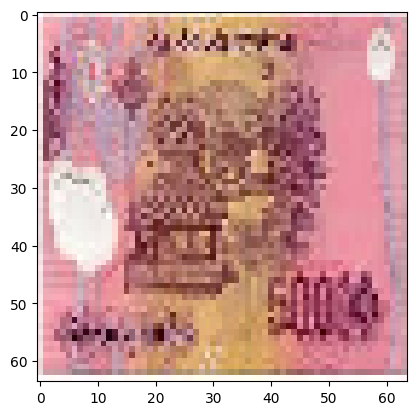

In [25]:
url = '/content/drive/MyDrive/AI/tien1.jpeg'
img = load_img (url, target_size= (64,64))
plt. imshow (img)
img = img_to_array (img) / 255
img = img. reshape (1,64,64, 3)
prediction = model. predict (img)
print( 'tien doan la:', np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
tien doan la: 5


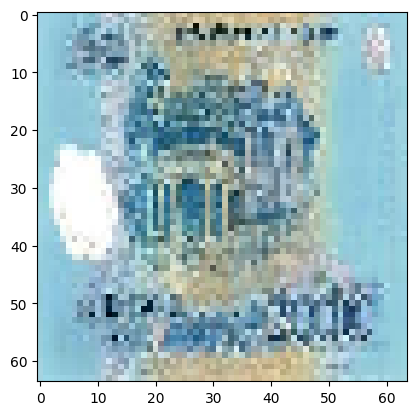

In [26]:
url = '/content/drive/MyDrive/AI/tien2.jpeg'
img = load_img (url, target_size= (64,64))
plt. imshow (img)
img = img_to_array (img) / 255
img = img. reshape (1,64,64, 3)
prediction = model. predict (img)
print( 'tien doan la:', np.argmax(prediction))

In [27]:
path = kagglehub.dataset_download("nguyentrongdai/vietnamese-foods-dataset")
print("Path to dataset files:", path)
if "files" in os.listdir(path):
    path = os.path.join(path, "files")

100%|██████████| 935M/935M [00:11<00:00, 87.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nguyentrongdai/vietnamese-foods-dataset/versions/1


In [28]:
def load_dataset(folder_path, class_names, img_size=(64, 64)):
    X, y = [], []
    for label, class_name in enumerate(class_names):
        subfolder = os.path.join(folder_path, class_name)
        if not os.path.isdir(subfolder):
            print(f"Bỏ qua: {subfolder} không tồn tại")
            continue
        for fname in os.listdir(subfolder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            path = os.path.join(subfolder, fname)
            img = cv2.imread(path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)


In [29]:
path = '/root/.cache/kagglehub/datasets/nguyentrongdai/vietnamese-foods-dataset/versions/1/dataset'
class_names = ['banh_bo','banh_bot_loc','banh_cong','banh_da_lon','banh_khot','banh_mi','banh_tai_heo','banh_tieu','banh_trung_thu','banh_xeo']
x, y = load_dataset(path, class_names)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
x_train, x_test = x_train / 255.0, x_test / 255.0


In [31]:
model = Sequential([
    Flatten(input_shape=x_train.shape[1:]),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.1215 - loss: 4.4714 - val_accuracy: 0.1640 - val_loss: 2.6871
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2238 - loss: 2.2642 - val_accuracy: 0.1536 - val_loss: 2.4634
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2339 - loss: 2.1962 - val_accuracy: 0.2723 - val_loss: 2.1761
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.3294 - loss: 1.9334 - val_accuracy: 0.2723 - val_loss: 2.2240
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3670 - loss: 1.9010 - val_accuracy: 0.2775 - val_loss: 2.1012
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.4106 - loss: 1.7634 - val_accuracy: 0.2723 - val_loss: 2.1318
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.3944 - loss: 1.7421 - val_accuracy: 0.2513 - val_loss: 2.1085
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.4037 - loss: 1.7107 - val_accuracy: 0.2932 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
tien doan la: 0


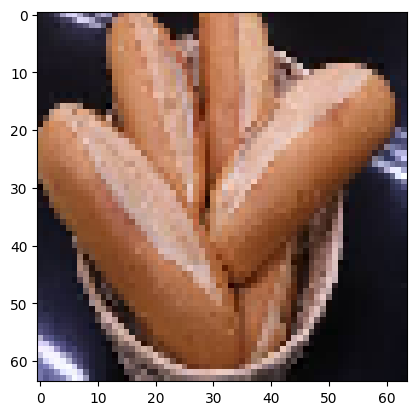

In [34]:
url = '/content/drive/MyDrive/AI/monanvietnam.jpeg'
img = load_img (url, target_size= (64,64))
plt. imshow (img)
img = img_to_array (img) / 255
img = img. reshape (1,64,64, 3)
prediction = model. predict (img)
print( 'tien doan la:', np.argmax(prediction))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
tien doan la: 3


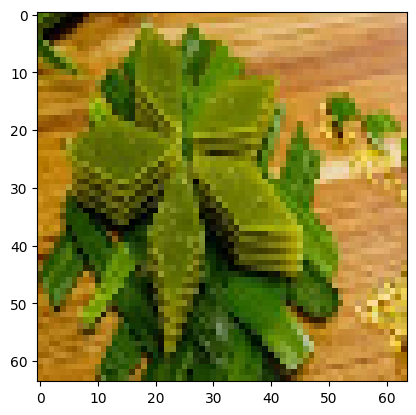

In [35]:
url = '/content/drive/MyDrive/AI/banhdalon.jpeg'
img = load_img (url, target_size= (64,64))
plt. imshow (img)
img = img_to_array (img) / 255
img = img. reshape (1,64,64, 3)
prediction = model. predict (img)
print( 'tien doan la:', np.argmax(prediction))

In [37]:
path = kagglehub.dataset_download("niten19/face-shape-dataset")
print("Path to dataset files:", path)
if "files" in os.listdir(path):
    path = os.path.join(path, "files")

100%|██████████| 639M/639M [00:07<00:00, 92.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/niten19/face-shape-dataset/versions/2


In [38]:
def load_dataset(folder_path, class_names, img_size=(60,60)):
    X, y = [], []
    for label, class_name in enumerate(class_names):
        subfolder = os.path.join(folder_path, class_name)
        if not os.path.isdir(subfolder):
            print(f"Bỏ qua: {subfolder} không tồn tại")
            continue
        for fname in os.listdir(subfolder):
            if not fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue
            path = os.path.join(subfolder, fname)
            img = cv2.imread(path)
            if img is None:
                continue
            img = cv2.resize(img, img_size)
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)

In [39]:
path = '/root/.cache/kagglehub/datasets/niten19/face-shape-dataset/versions/2'
path_train = path + '/FaceShape Dataset/training_set'
path_test = path + '/FaceShape Dataset/testing_set'
class_names = ['Heart', 'Oblong', 'Oval', 'Round', 'Square']
x_train, y_train = load_dataset(path_train, class_names)
x_test, y_test = load_dataset(path_test, class_names)
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [40]:
model = Sequential([
    Flatten(input_shape=(60,60,3)),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')])

In [41]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 89ms/step - accuracy: 0.2383 - loss: 3.4157 - val_accuracy: 0.2900 - val_loss: 1.5996
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.3286 - loss: 1.5669 - val_accuracy: 0.2540 - val_loss: 1.6404
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.3357 - loss: 1.5387 - val_accuracy: 0.2870 - val_loss: 1.5783
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.3378 - loss: 1.5415 - val_accuracy: 0.2910 - val_loss: 1.6162
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.3641 - loss: 1.4731 - val_accuracy: 0.3170 - val_loss: 1.5730
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.3681 - loss: 1.4549 - val_accuracy: 0.3260 - val_loss: 1.5276
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.3710 - loss: 1.4470 - val_accuracy: 0.3080 - val_loss: 1.5496
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - accuracy: 0.3905 - loss: 1.4300 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
tien doan la: 3


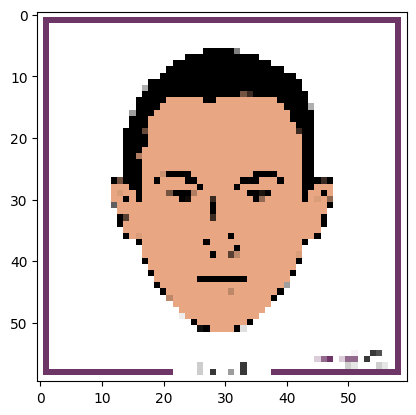

In [43]:
url = '/content/drive/MyDrive/AI/mat.png'
img = load_img (url, target_size= (60,60))
plt. imshow (img)
img = img_to_array (img) / 255
img = img. reshape (1,60,60,3)
prediction = model. predict (img)
print( 'tien doan la:', np.argmax(prediction))